In [71]:
require(data.table)

Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.2"

# Task 1

In this task, we are asked to perform dimensionality reduction analysis.

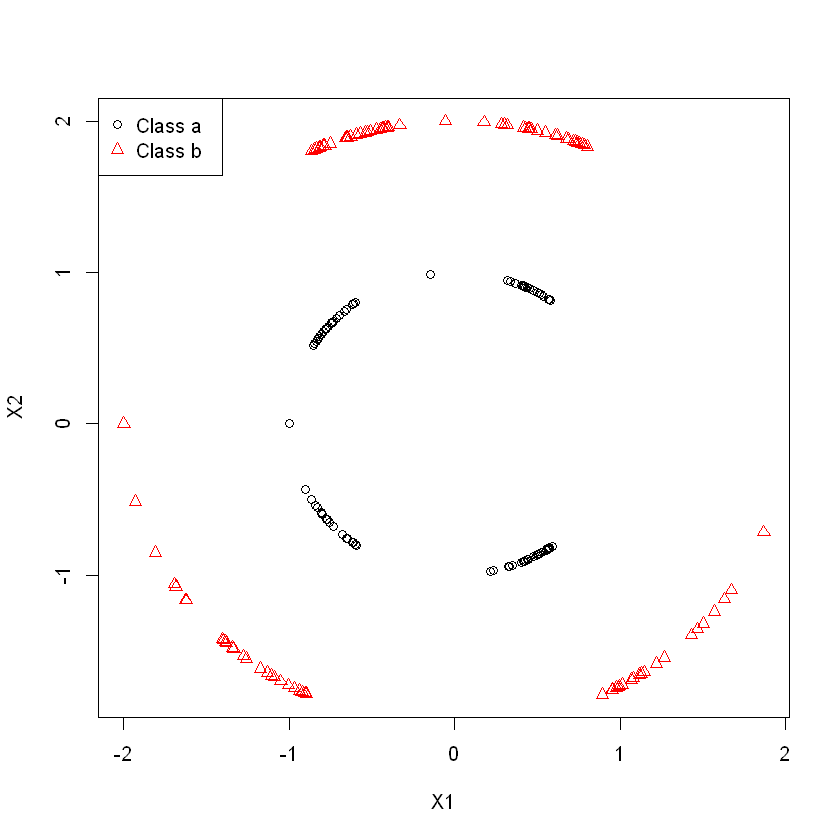

In [72]:
dat=read.csv("IE582_Fall21_HW2_q1_data.csv",header=T)
lev=as.numeric(dat[,3])
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

In [73]:
head(dat)

X1,X2,class
0.5694828,0.8220033,a
0.4114692,0.9114237,a
0.4173846,-0.9087299,a
-0.7918276,0.6107447,a
-0.8067767,-0.5908565,a
-0.7154271,0.6986874,a


## 1.a

* We will perform PCA to reduce the dimensions from 2 to 1. 
* However, data does not seem linear, so the resulting component may fail to represent whole picture.

In [74]:
summary(dat)

       X1                X2          class 
 Min.   :-2.0000   Min.   :-1.7908   a:99  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99  
 Median :-0.2408   Median : 0.2578         
 Mean   :-0.1147   Mean   : 0.1006         
 3rd Qu.: 0.5128   3rd Qu.: 0.9786         
 Max.   : 1.8671   Max.   : 1.9992         

In [75]:
cor(dat[,1:2])

,X1,X2
X1,1.0000000000,0.0008849583
X2,0.0008849583,1.0000000000


* 2 columns does not seem correlated, correlation is necessary for successful PCA.

In [79]:
pca <- princomp(dat[,1:2], cor=T)
summary(pca, loadings=T)

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

* Here, we see that only 50% (half) of the variation can be represented by Component 1

In [82]:
dat= data.table(dat)
dat[, prin_comp := 0.707*(dat$X1 + dat$X2)]

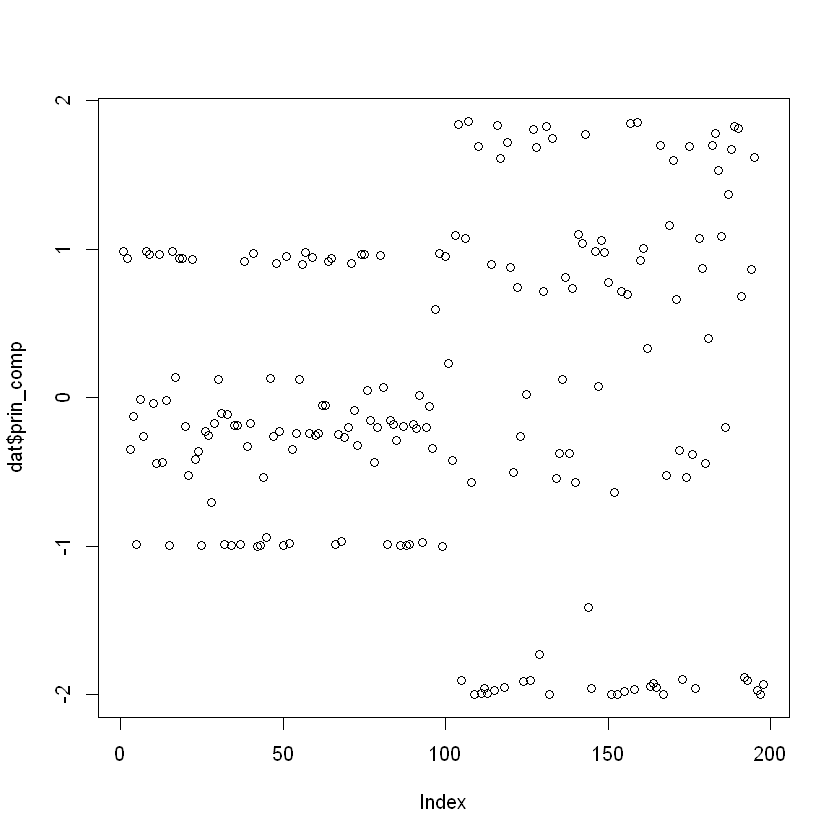

In [83]:
plot(dat$prin_comp)

## 1.b

* Now, we reduce the number of dimension using MDS
* While calculating distance matrix, I used manhattan and euclidean distances

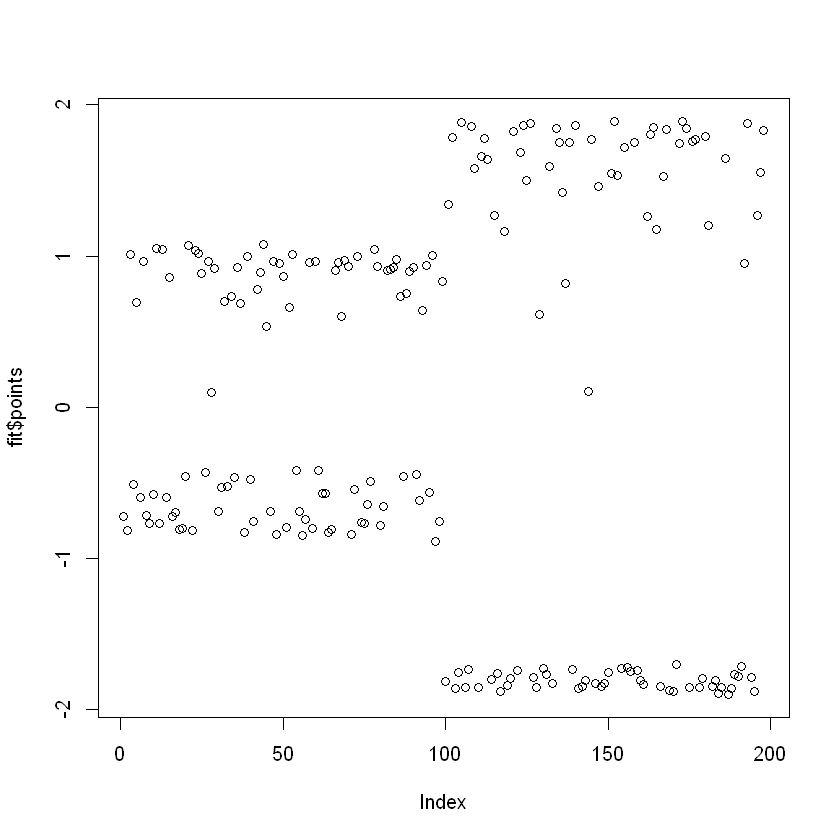

In [86]:
mds_euclidean = dat[,1:2]
d <- dist(mds_euclidean, method = "euclidean") 
fit <- cmdscale(d,eig=TRUE, k=1)
plot(fit$points)

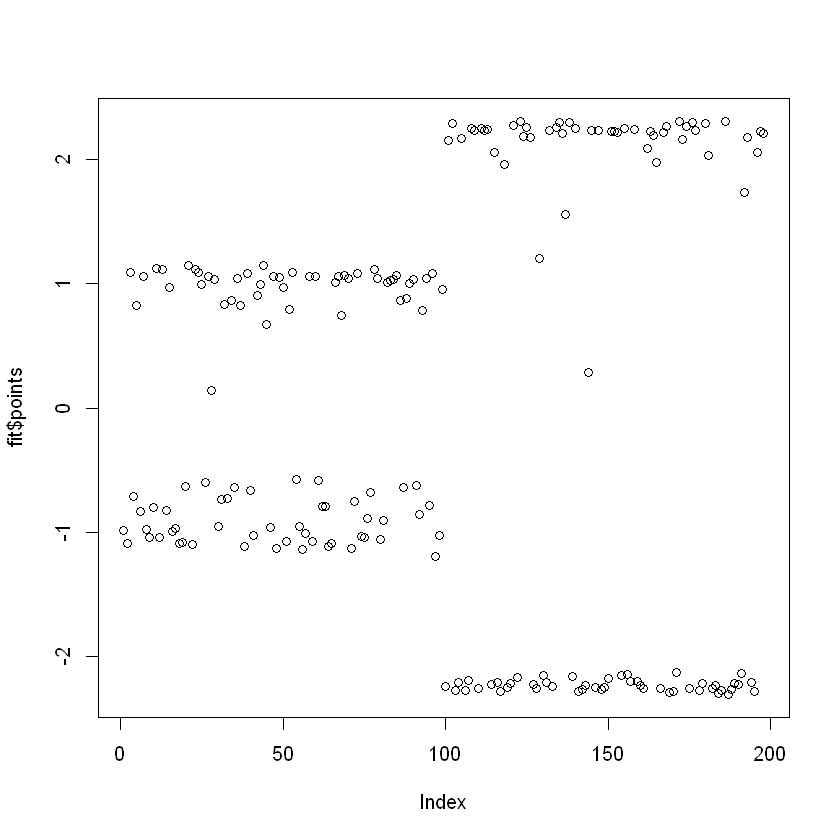

In [87]:
mds_manhattan = dat[,1:2]
d <- dist(mds_manhattan, method = "manhattan") 
fit <- cmdscale(d,eig=TRUE, k=1)
plot(fit$points)

## 1.c

* From PCA's plot I see that first 100 points are randomly located around a middle point. Next 100 points are also similarly around a point with a higher variance. 
* It provides a rough information about the data, however it fails to explain most of the shape.

* It seems like that MDS is separating points into 4 classes: 1 unit forward, 1 unit backward, 2 unit forward or 2 unit backward the middle point.
* Variation on the first and second 100 data points is similar to PCA.
* Looking at the original plot I can say that this is providing a meaningful information. 
* In addition to PCA we may infer that there is no point in middle. (PCA fails here, probably because the data is nonlinear.)

* Using Manhattan distances, MDS distinguishes some points better, the points above 2 on the scatter plot.
* This is because the red points on top at the original plot are not circularly rotated around origin. Using Euclidean distances, MDS fails a little to assign similar values to these points.

## 1.d

* We add some new features and apply PCA again.

In [88]:
enriched = dat[,1:2]
enriched[, X1_sqr := enriched$X1*enriched$X1]
enriched[, X2_sqr := enriched$X2*enriched$X2]
enriched[, X1_X2 := enriched$X1*enriched$X2]

In [89]:
summary(enriched)

       X1                X2              X1_sqr             X2_sqr      
 Min.   :-2.0000   Min.   :-1.7908   Min.   :0.003305   Min.   :0.0000  
 1st Qu.:-0.7994   1st Qu.:-0.9445   1st Qu.:0.249322   1st Qu.:0.6560  
 Median :-0.2408   Median : 0.2578   Median :0.457800   Median :0.8974  
 Mean   :-0.1147   Mean   : 0.1006   Mean   :0.708035   Mean   :1.7920  
 3rd Qu.: 0.5128   3rd Qu.: 0.9786   3rd Qu.:0.812388   3rd Qu.:3.2030  
 Max.   : 1.8671   Max.   : 1.9992   Max.   :4.000000   Max.   :3.9967  
     X1_X2         
 Min.   :-1.99945  
 1st Qu.:-0.49940  
 Median :-0.30717  
 Mean   :-0.01055  
 3rd Qu.: 0.49849  
 Max.   : 1.99978  

In [90]:
cor(enriched)

,X1,X2,X1_sqr,X2_sqr,X1_X2
X1,1.0000000000,0.0008849583,-0.21732096,0.110299430,-0.418221702
X2,0.0008849583,1.0000000000,-0.46385646,0.337210928,-0.054897012
X1_sqr,-0.2173209550,-0.4638564555,1.00000000,-0.047837447,0.086866167
X2_sqr,0.1102994296,0.3372109275,-0.04783745,1.000000000,0.003243515
X1_X2,-0.4182217020,-0.0548970116,0.08686617,0.003243515,1.000000000


In [91]:
pca_new <- princomp(enriched, cor=T)
summary(pca_new, loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1      0.419  0.556  0.128  0.571  0.415
X2      0.538 -0.454        -0.368  0.600
X1_sqr -0.539  0.162  0.578 -0.273  0.524
X2_sqr  0.351 -0.313  0.797  0.127 -0.356
X1_X2  -0.348 -0.600         0.669  0.258

In [96]:
#Eigenvalues
pca_new$sd^2

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.7199160 1.3245681 0.9454741 0.6381908 0.3718509

* First 3 component covers nearly 80% of the variation and first 4 covers nearly 93% of the variation. 3 or 4 components may represent most of the variation.
* First 2-3 eigenvalues are high where last 2 are relatively smaller. Especially the third is too small. We can see that the last 1-2 component may not contribute too much to define the variation in the data since the variance in that direction is small.

# Task 2

* We will construct Turkey map using distances between cities
* I rearranged xls file, removed redundant columns and prepared a csv to use in this task.
* In code, I filled the distance from the a city to itself with zeros.
* To make the distance matrix symmetric, I copied lower triangle of the matrix to the upper.

In [51]:
distance_matrix = read.csv("ilmesafe_modified.csv", row.names=1, encoding = "UTF-8")
distance_matrix[is.na(distance_matrix)]<-0

In [52]:
for(i in 1:81){for(j in 1:81){if(i<j){
distance_matrix[i,j] = distance_matrix[j,i] }}}

In [54]:
mds_tr <- cmdscale(distance_matrix, eig=TRUE, k=2)

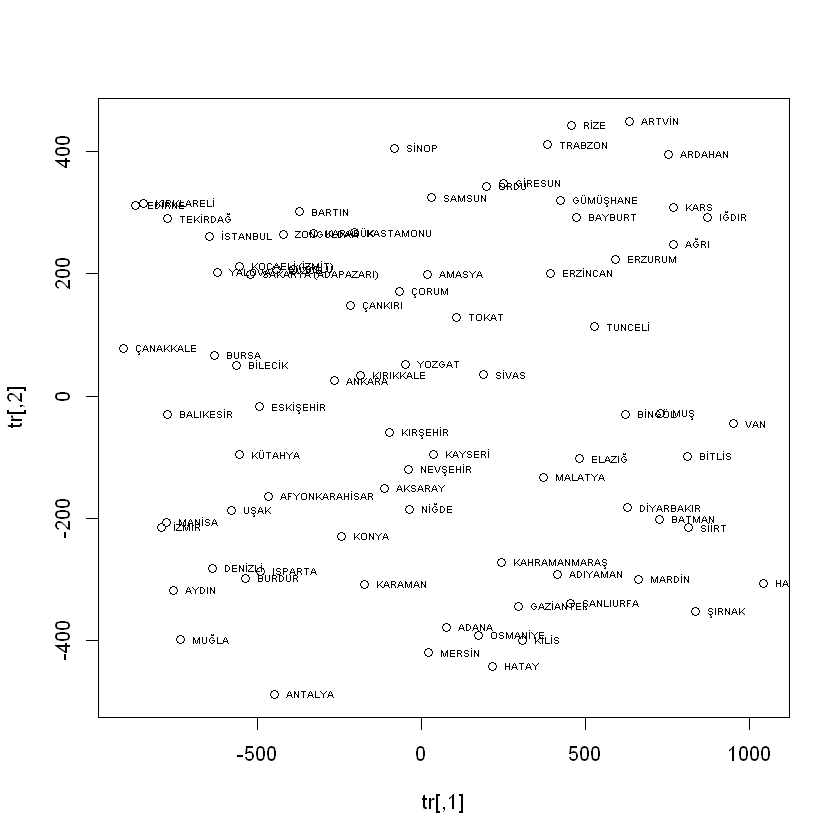

In [56]:
tr = mds_tr$points
plot(tr)
text(tr, labels=rownames(fit$points), pos = 4, cex = 0.5)

* Most cities are somewhere around the spot they actually are located at.
* Antalya seems far outside, probably because the roads to Antalya has a lot of turns and the road is longer that actual distance. There are similar cases.
* Cities having direct road seems closer here. Konya and Antalya looks too far in that map, however, they are closer geographically. 

# Task 3

* We are asked to perform PCA on time series data.
* We will work on gesture acceleration data.
* From acceleration data, position data is created.

In [21]:
install.packages("scatterplot3d") # Install
library("scatterplot3d") # load

Installing package into 'C:/Users/samet.ozturk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samet.ozturk\AppData\Local\Temp\Rtmp4sS3V9\downloaded_packages


In [22]:
x_train = read.table("uWaveGestureLibrary_X_TRAIN")
y_train = read.table("uWaveGestureLibrary_Y_TRAIN")
z_train = read.table("uWaveGestureLibrary_Z_TRAIN")

In [99]:
class = x_train[,1]

x_velocity = apply(t(x_train[,-1]), 2, cumsum)
x_position = apply(x_velocity, 2, cumsum)
x_position = t(x_position)

y_velocity = apply(t(y_train[,-1]), 2, cumsum)
y_position = apply(y_velocity, 2, cumsum)
y_position = t(y_position)

z_velocity = apply(t(z_train[,-1]), 2, cumsum)
z_position = apply(z_velocity, 2, cumsum)
z_position = t(z_position)

# 3.a)

* To understand better, we will visualize one time series instance from each class.
* c = class selected for the plot

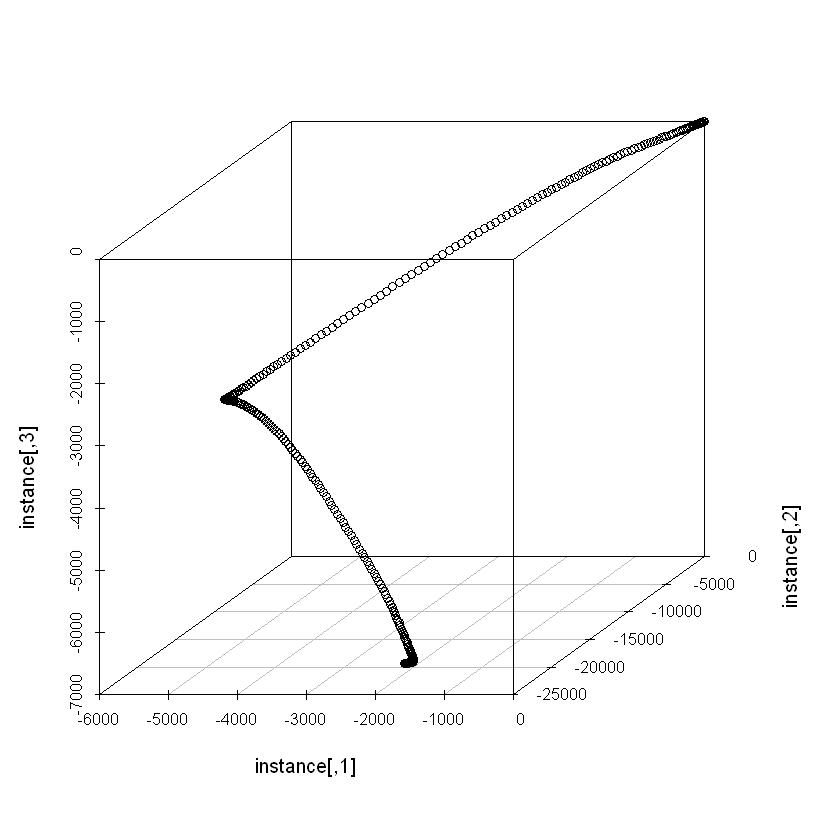

In [198]:
c <- 1
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

* Looks like gesture 1

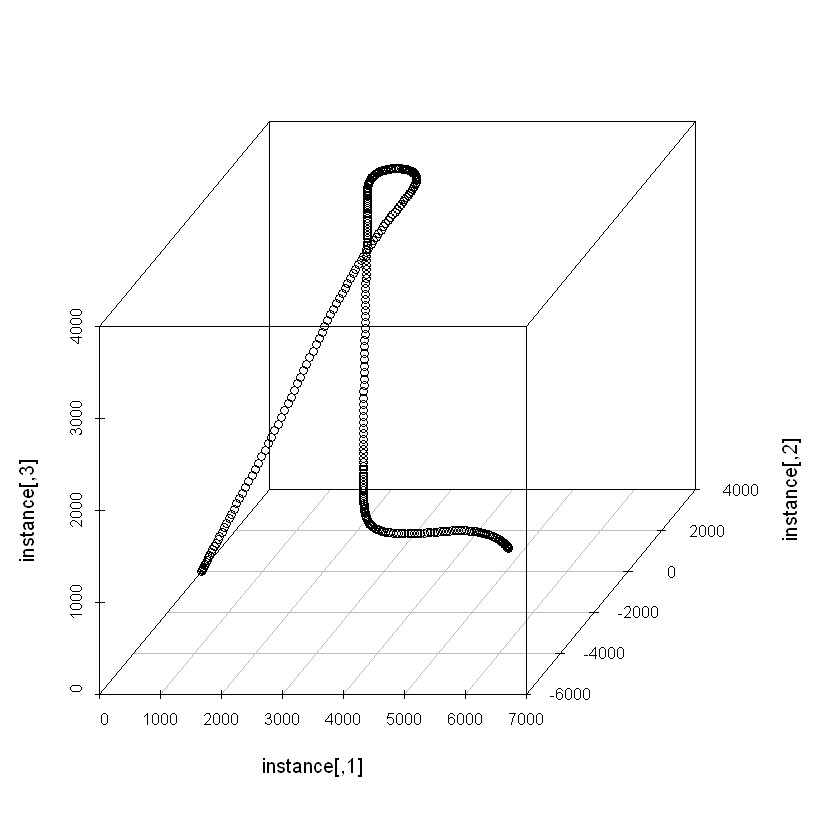

In [26]:
c <- 2
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

* Looks like gesture 2 but not sure.

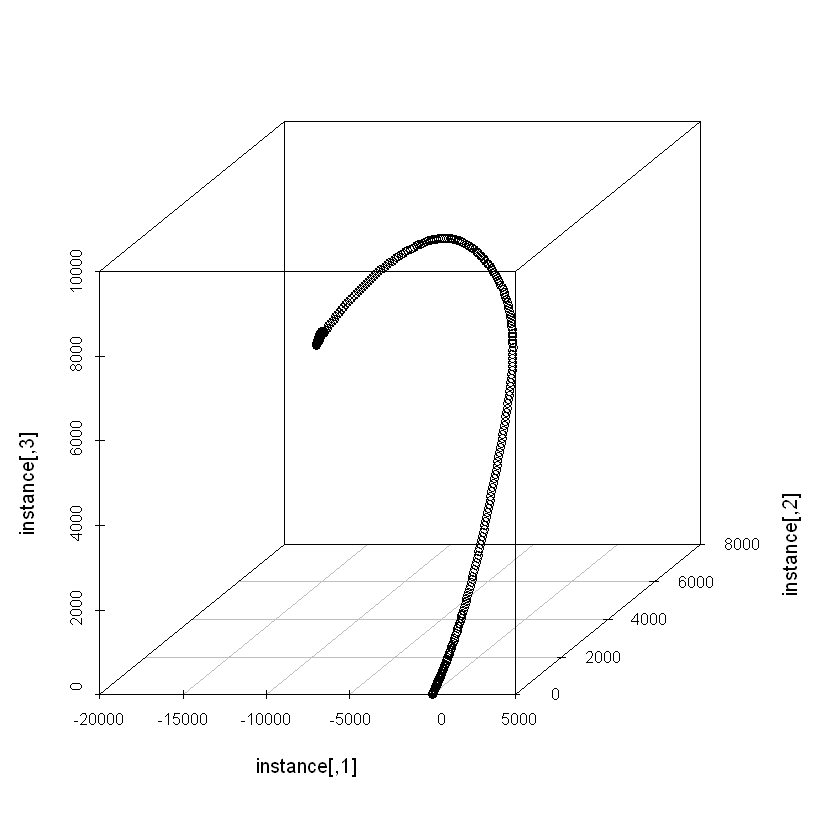

In [28]:
c <- 3
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

* Depending on the perspective, this may look like moost of the gestures. But I guess it is 3

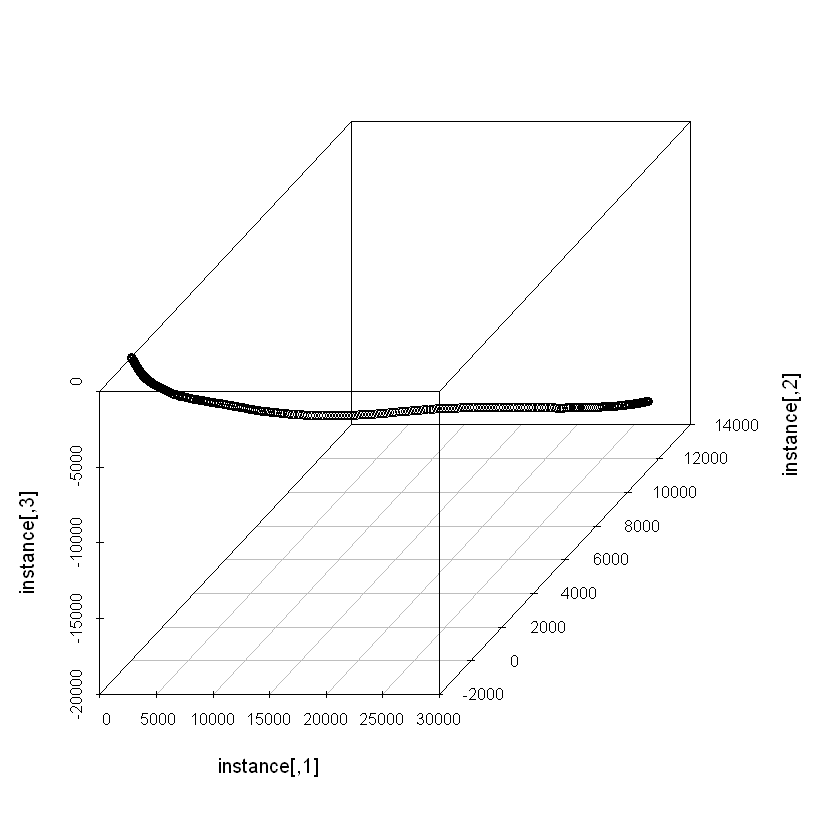

In [29]:
c <- 4
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

* Point of view may make a difference on understanding the gesture. I guess they are in order given in the task.

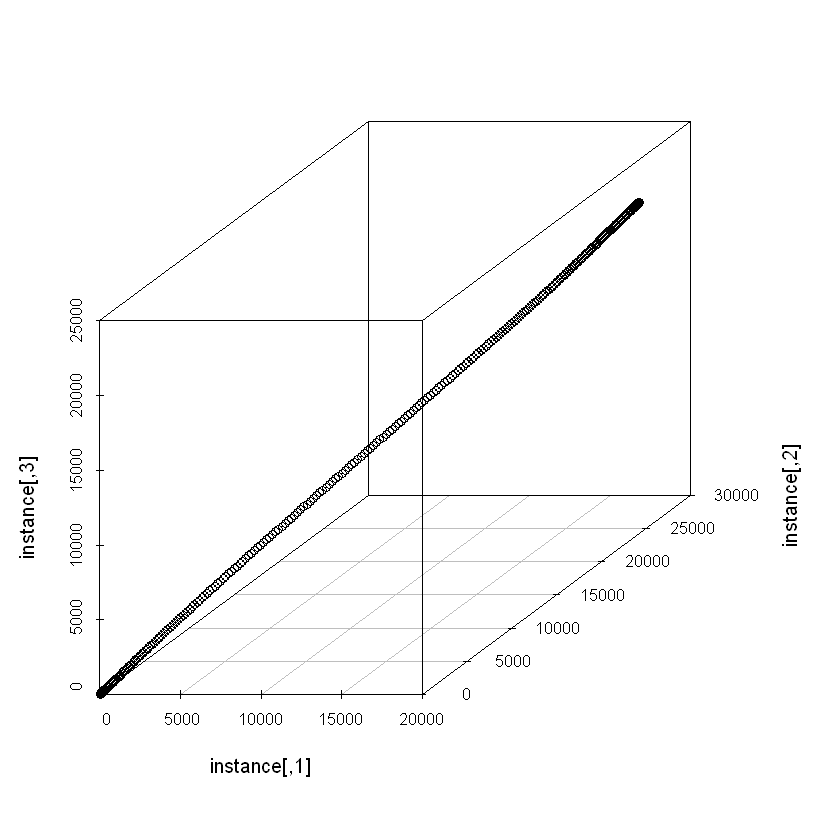

In [30]:
c <- 5
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

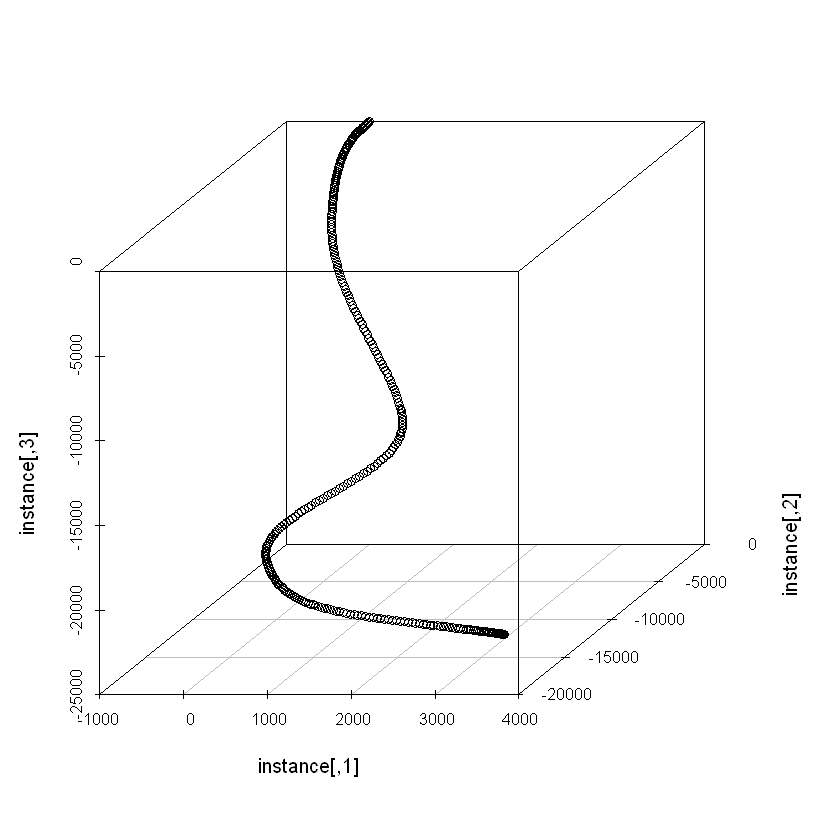

In [31]:
c <- 6
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

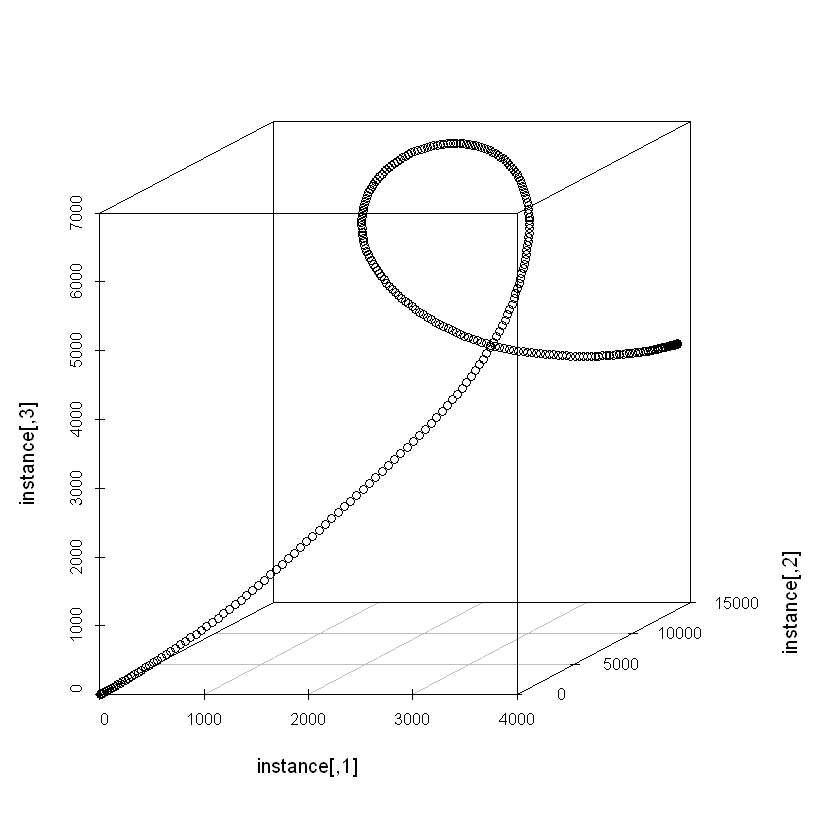

In [32]:
c <- 7
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

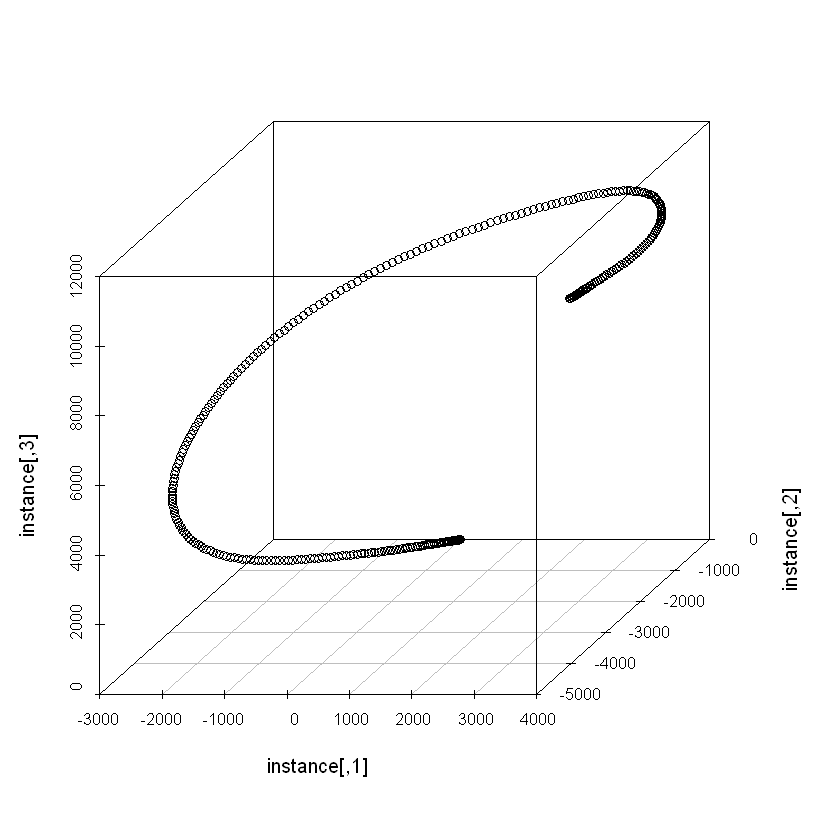

In [33]:
c <- 8
instance <- cbind(x_position[class==c,][1,], y_position[class==c,][1,], z_position[class==c,][1,])
scatterplot3d(instance)

## 3.b

In [176]:
concat <- cbind(x_position, y_position, z_position)

In [177]:
head(concat)

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
-0.304243210,-0.91272963,-1.82545926,-3.04243210,-4.56364815,-6.3891074,-8.518810,-10.9527556,-13.6909444,-16.7333765,...,-22393.514,-22397.081,-22400.144,-22402.714,-22404.810,-22406.450,-22407.652,-22408.435,-22408.818,-22408.818
1.627311100,4.88193330,9.76386660,16.27311100,24.40966650,34.1735331,45.564711,58.5831996,73.2289995,89.5021105,...,21466.255,21469.861,21473.040,21475.792,21478.115,21479.997,21481.427,21482.392,21482.880,21482.880
0.661276530,1.98382959,3.96765918,6.61276530,9.91914795,13.8868071,18.515743,23.8059551,29.7574438,36.3702092,...,23633.048,23639.950,23645.989,23651.165,23655.479,23658.930,23661.518,23663.243,23664.106,23664.106
0.005184784,0.01555435,0.03110871,0.05184784,0.07777177,0.1088805,0.145174,0.1866522,0.2333153,0.2851631,...,5382.058,5379.667,5377.219,5374.783,5372.426,5370.227,5368.282,5366.781,5365.930,5365.930
1.286197800,3.85859340,7.71718680,12.86197800,19.29296700,27.0101538,36.013538,46.3031208,57.8789010,70.7408790,...,-16912.339,-16925.473,-16936.852,-16946.591,-16954.810,-16961.576,-16966.826,-16970.443,-16972.311,-16972.311
-0.479252460,-1.43775738,-2.87551476,-4.79252460,-7.18878690,-10.0643017,-13.419069,-17.2530886,-21.5663607,-26.3588853,...,8727.600,8723.712,8720.457,8717.802,8715.706,8714.127,8713.016,8712.324,8712.002,8712.002


Class 1

In [178]:
c <- 1
class_concat <- concat[class == c,]

In [180]:
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,97669.04333,70846.09215
Proportion of Variance,0.48711,0.25630
Cumulative Proportion,0.48711,0.74341


* 74% of the variation is covered.

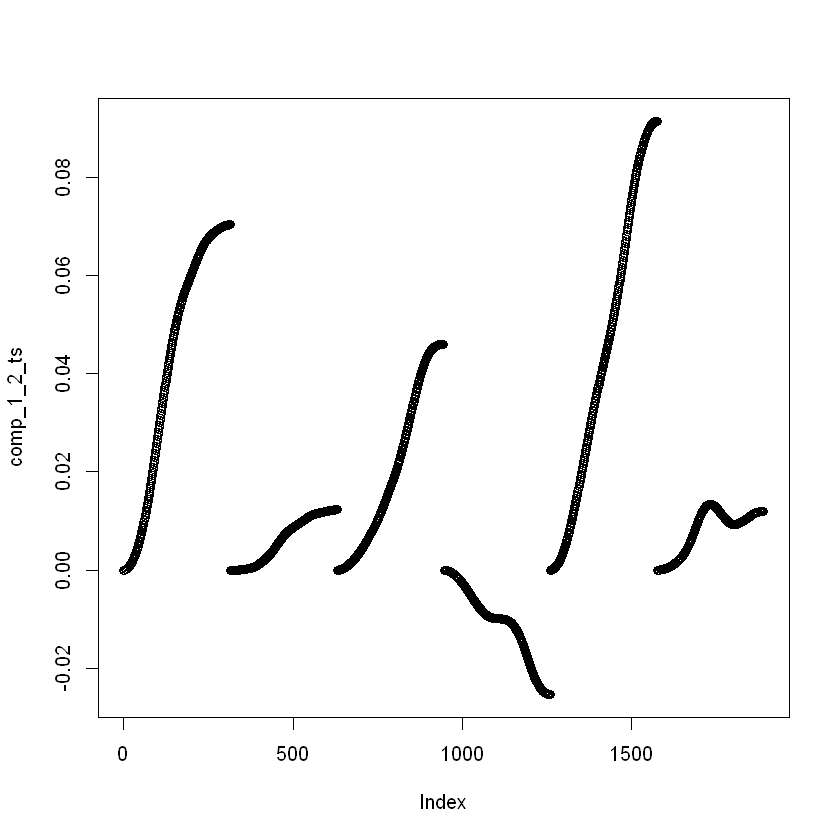

In [181]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 2

In [182]:
c <- 2
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,58221.69440,39958.45960
Proportion of Variance,0.54008,0.25439
Cumulative Proportion,0.54008,0.79447


* 79% of the variation is covered for Class 2 using 2 components.

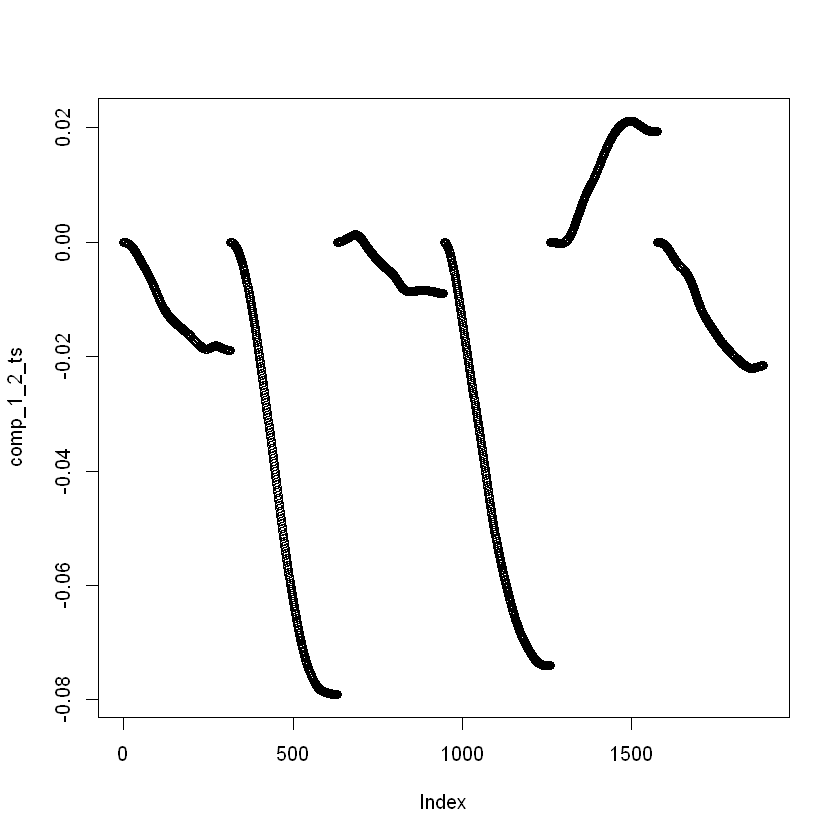

In [183]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 3

In [184]:
c <- 3
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,148992.92030,133423.39824
Proportion of Variance,0.48952,0.39256
Cumulative Proportion,0.48952,0.88209


* 88% of the variation is covered for Class 3 using 2 components. 

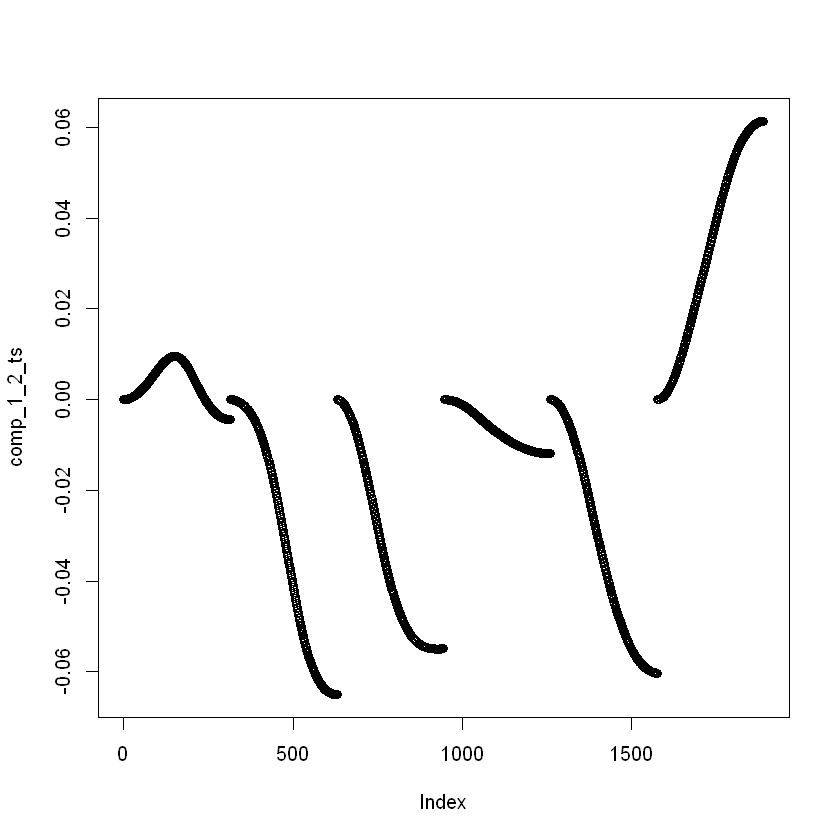

In [186]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 4

In [187]:
c <- 4
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,168774.43720,135564.59978
Proportion of Variance,0.55018,0.35496
Cumulative Proportion,0.55018,0.90515


* 90% of the variation is covered for Class 4 using 2 components. 

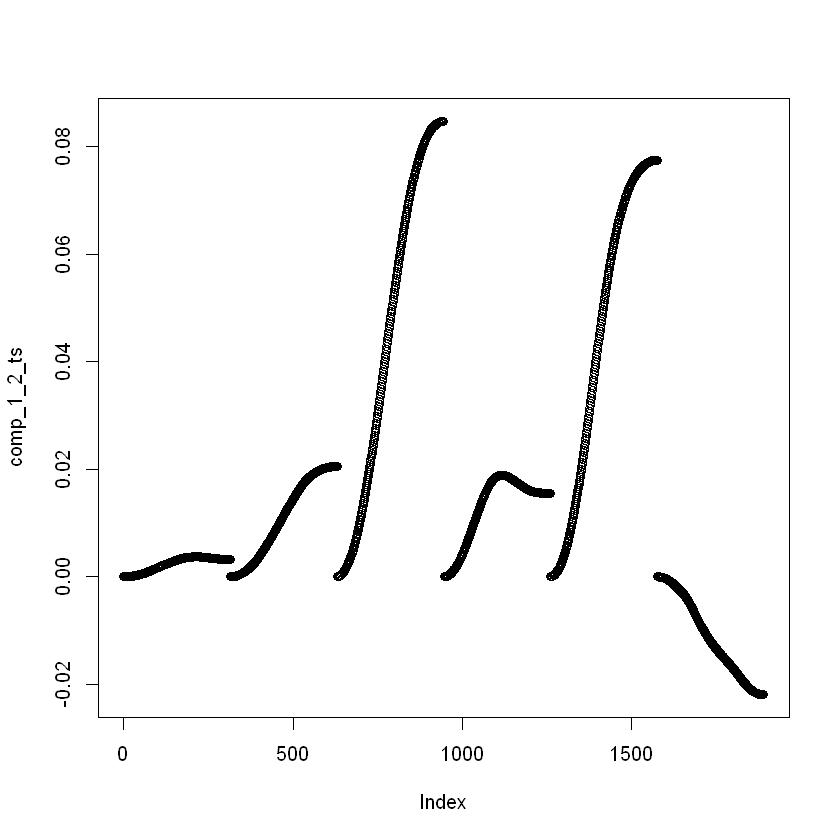

In [188]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 5

In [189]:
c <- 5
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,189150.66732,91867.43615
Proportion of Variance,0.76606,0.18071
Cumulative Proportion,0.76606,0.94677


* 95% of the variation is covered for Class 5 using 2 components. 

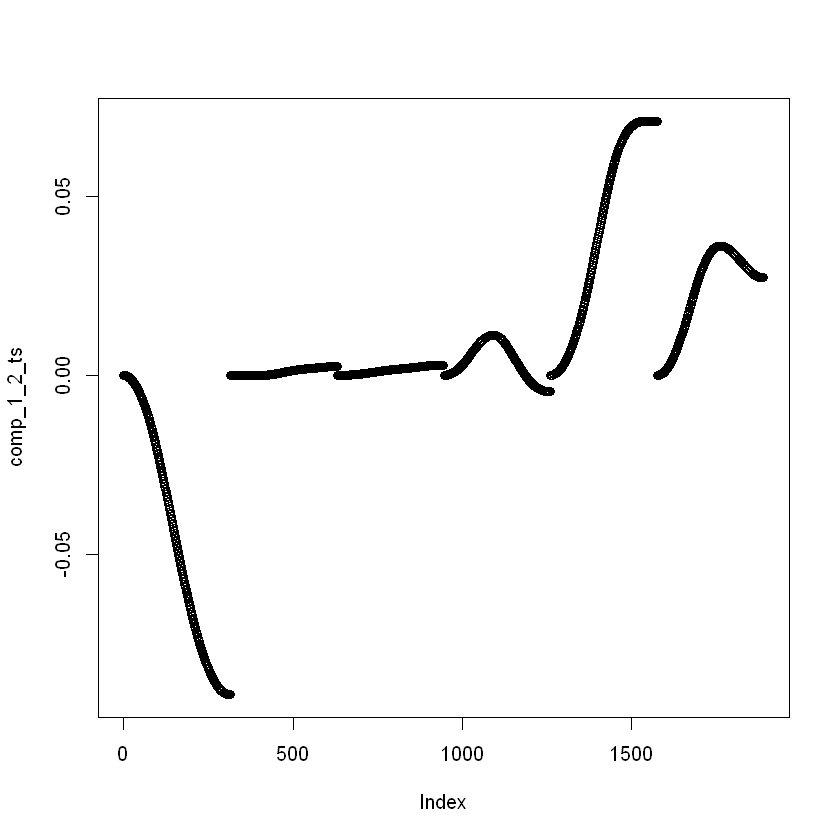

In [190]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 6

In [191]:
c <- 6
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,213174.56275,164680.41399
Proportion of Variance,0.56135,0.33500
Cumulative Proportion,0.56135,0.89635


* 90% of the variation is covered for Class 6 using 2 components.

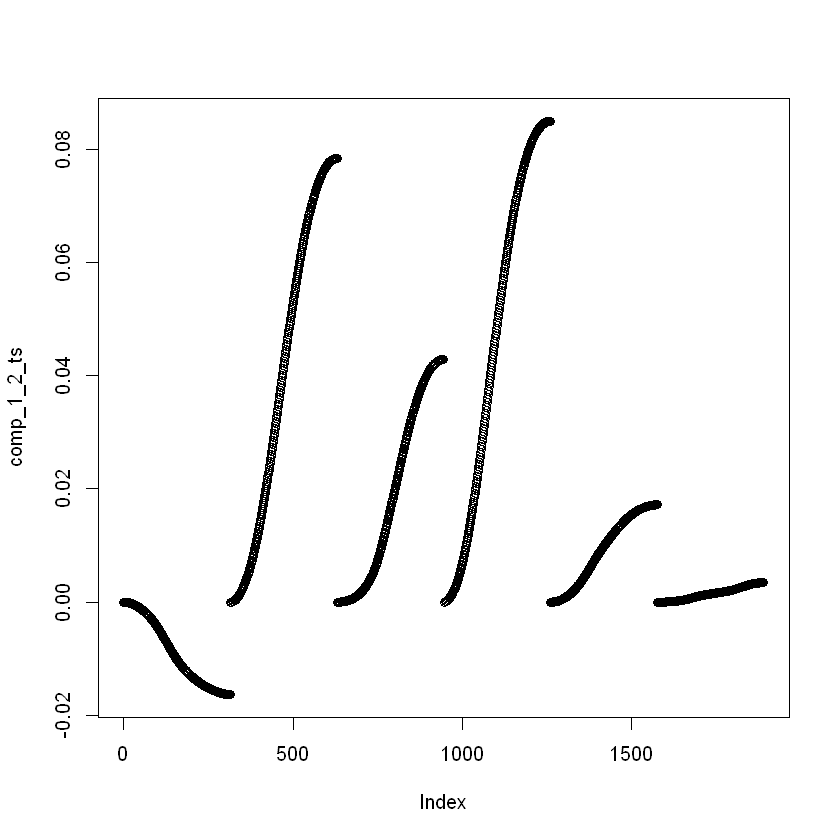

In [192]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 7

In [193]:
c <- 7
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,128042.62536,65573.93333
Proportion of Variance,0.69946,0.18345
Cumulative Proportion,0.69946,0.88291


* 88% of the variation is covered for Class 7 using 2 components.

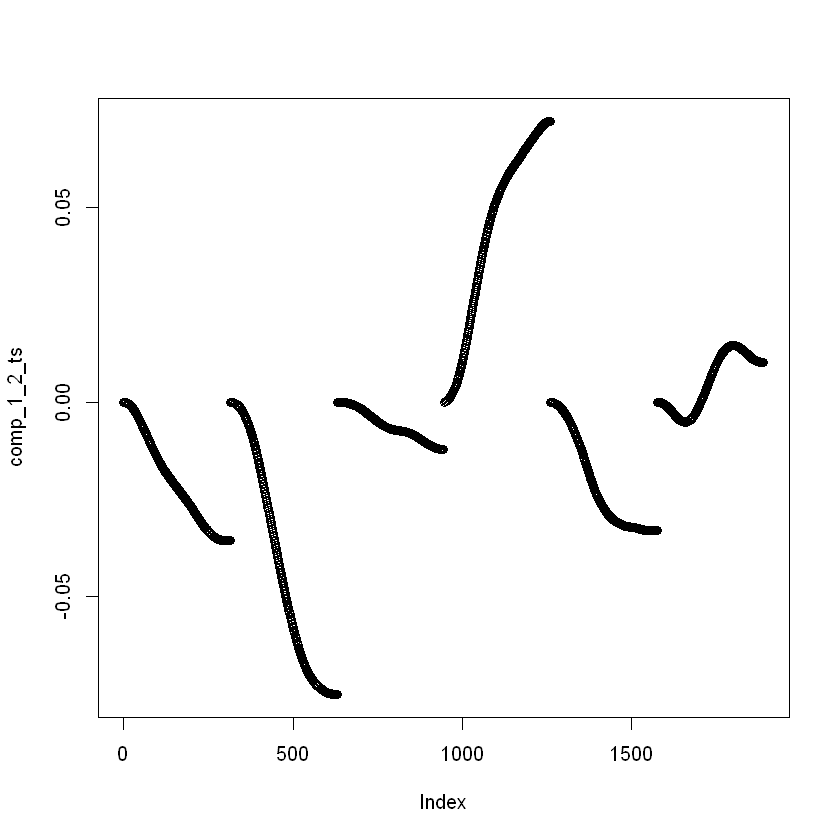

In [194]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

Class 8 

In [195]:
c <- 8
class_concat <- concat[class == c,]
pca <- prcomp(class_concat)
summary(pca)$importance[,c(1,2)]

,PC1,PC2
Standard deviation,90682.58527,70512.54401
Proportion of Variance,0.52435,0.31703
Cumulative Proportion,0.52435,0.84138


* 84% of the variation is covered for Class 8 using 2 components.

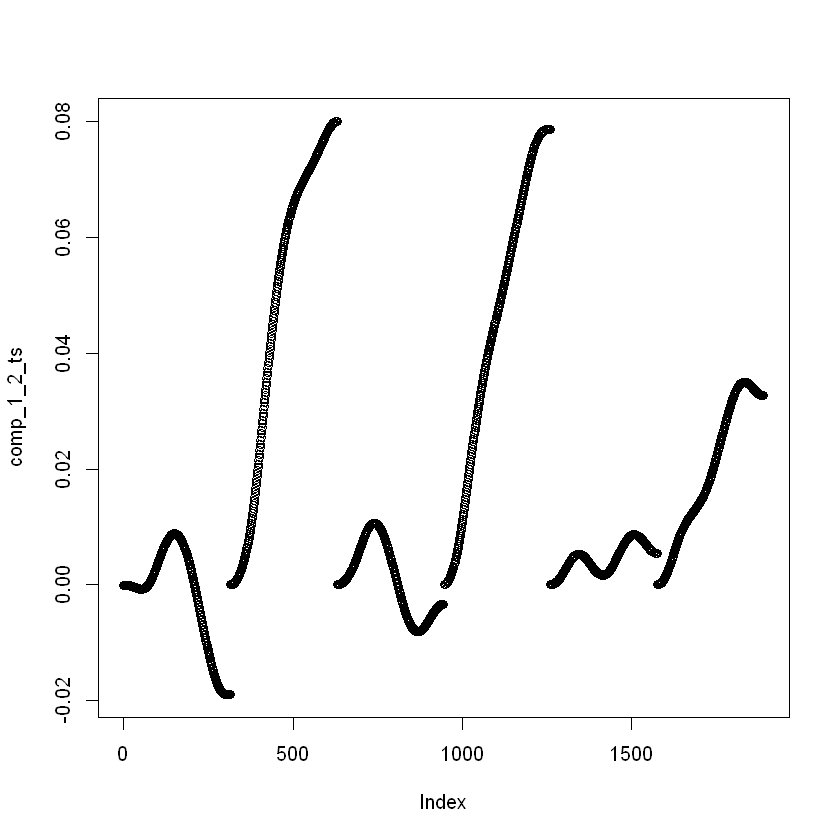

In [196]:
comp_1_2_ts <- rbind(pca$rotation[,c(1, 3)], pca$rotation[,c(2,3)])[,1]
plot(comp_1_2_ts)

* The eigenvectors combine 3 time series representing 3 dimensions. 2 eigenvectors are there -> 6 segments
* Each segment shows where the variation is being explained. For instance in the last plot, in the first eigenvector, most of the variation is explained by the movement made in the second half of the time frame in dimension y. Since its value is away from 0, the movements happened there will be used for this componenet to describe the variation.
* The eigenvectors are giving hints about the gestures, in that sense.